In [2]:
import cv2


In [3]:
import matplotlib.pyplot as plt


In [5]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'

In [6]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)


In [7]:
classLabels = [] ## empty list of python

file_name = 'Labels.txt'

with open(file_name, 'rt') as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')
    #classlobles.append(fpt.read())

In [8]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'hot dog', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'apple', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'pizza', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'mobile', 'hair drier', 'toothbrush']


In [9]:
print(len(classLabels))

79


In [10]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)##255/2=127.5
model.setInputMean([127.5,127.5,127.5])
model.setInputSwapRB(True)

< cv2.dnn.Model 000002895A78CC10>

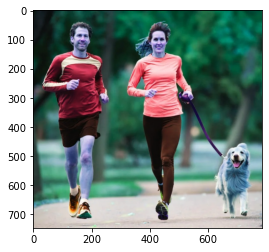

In [11]:
#read an image / 1.Taking input image 
img=cv2.imread('ob.jpg')
plt.imshow(img)#bgr by default


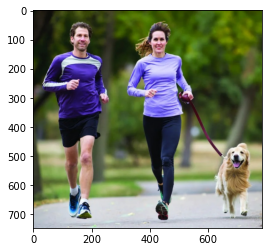

In [12]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) #2.preprocessing / actual img

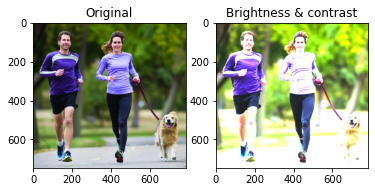

In [13]:
#2.image Enhancement(preprocessing)

import cv2 
import matplotlib.pyplot as plt 
import numpy as np 

# Load the image 
image = cv2.imread('ob.jpg') 

#Plot the original image 
plt.subplot(1, 2, 1) 
plt.title("Original") 
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

# Adjust the brightness and contrast 
# Adjusts the brightness by adding 10 to each pixel value 
brightness = 10
# Adjusts the contrast by scaling the pixel values by 2.3 
contrast = 2.3
image2 = cv2.addWeighted(image, contrast, np.zeros(image.shape, image.dtype), 0, brightness) 

#Save the image 
cv2.imwrite('modified_image.jpg', image2) 
#Plot the contrast image 
plt.subplot(1, 2, 2) 
plt.title("Brightness & contrast") 
#plt.imshow(image2) 
plt.imshow(cv2.cvtColor(image2,cv2.COLOR_BGR2RGB))
plt.show()

Text(0.5, 1.0, 'Thining Image')

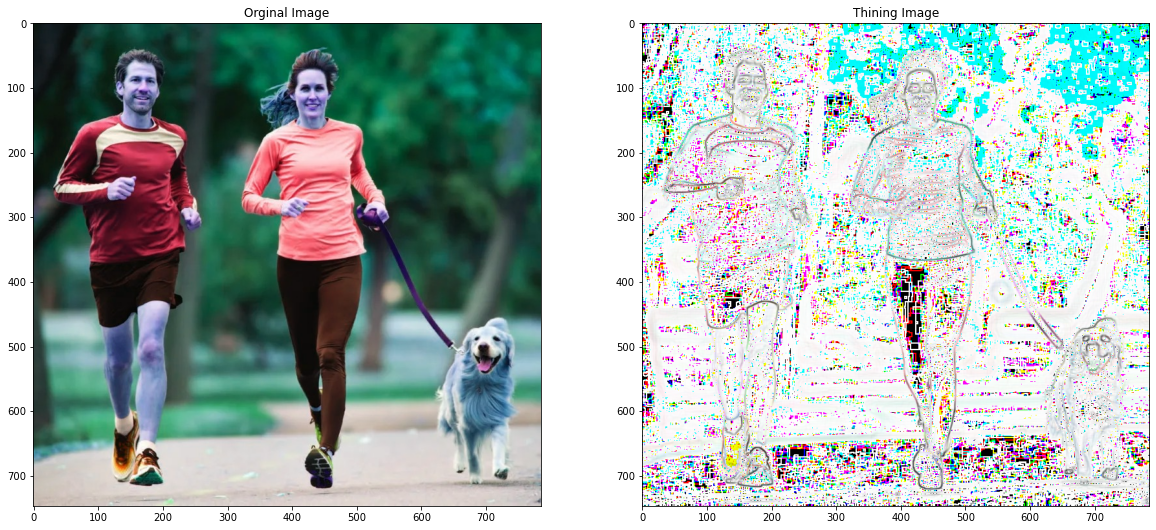

In [14]:
# 3.segmentation

import numpy as np
thin = np.zeros(image.shape,dtype='uint8')#remove selected foreground pixels from binary images
kernel = np.ones((5, 5), np.uint8)
img_erosion = cv2.erode(img, kernel, iterations=1)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
subset_img = img_erosion-opening
thin = cv2.bitwise_or(subset_img,thin)
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Orginal Image')
plt.subplot(1,2,2)
plt.imshow(thin)
plt.title('Thining Image')

In [15]:
pip install pytesseract

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install pytesseract pillow

Note: you may need to restart the kernel to use updated packages.


In [18]:
# 3.word segmentation (text detection from image)

import pytesseract
from PIL import Image, ImageEnhance, ImageFilter, ImageDraw
import matplotlib.pyplot as plt

# Set Tesseract path (adjust the path accordingly)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def preprocess_image(image_path):
    # Open the image file
    image = Image.open(image_path)

    # Convert the image to grayscale
    grayscale_image = image.convert('L')

    # Enhance the image to improve text visibility
    enhanced_image = ImageEnhance.Contrast(grayscale_image).enhance(2.0)
    enhanced_image = enhanced_image.filter(ImageFilter.SHARPEN)

    # Save the preprocessed image for reference (optional)
    enhanced_image.save('preprocessed_image.png')

    return enhanced_image

def extract_text_from_image(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)

    # Perform OCR using PyTesseract
    text = pytesseract.image_to_string(preprocessed_image)

    # Draw red borders around the detected characters
    draw = ImageDraw.Draw(preprocessed_image)
    boxes = pytesseract.image_to_boxes(preprocessed_image)
    for b in boxes.splitlines():
        b = b.split()
        x, y, w, h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
        draw.rectangle([x, preprocessed_image.size[1] - h, w, preprocessed_image.size[1] - y], outline="red", width=2)

    # Display the original and processed images using Matplotlib
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(Image.open(image_path))
    plt.title('Original Image')

    # Image with Red Borders
    plt.subplot(1, 2, 2)
    plt.imshow(preprocessed_image)
    plt.title('Charater detection')

    plt.show()

    # Save the image with red borders
    preprocessed_image.save('image_with_borders.png')

    # Print the extracted text
    print(text)

# Specify the path to your image
image_path = 'C:\\Users\\Evan\\Downloads\\ip project\\Screenshot 2023-11-13 123624.png'

# Extract text from the image and show the original image with red borders
extract_text_from_image(image_path)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Evan\\Downloads\\ip project\\Screenshot 2023-11-13 123624.png'

In [19]:
# 4.feature extraction/representation(showing height or weight value)
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 

# Load the image 
image = cv2.imread('ob.jpg') 
print(image.shape)

(747, 785, 3)


In [24]:
#5.object detection

ClassIndex, confidece, bbox = model.detect(img, confThreshold=0.5)

In [25]:
print(ClassIndex)

[ 1  1 18]


In [26]:
 

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(),bbox):
        cv2.rectangle(img,boxes,(255,0,0),2)
        cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

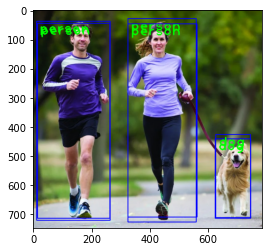

In [27]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [28]:
#Live object detection (Video)

cap = cv2.VideoCapture(1)

#Check if the video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")

font_scale = 3
font =cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame =cap.read()
    
    ClassIndex, confidece, bbox = model.detect(frame,confThreshold =0.55)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale = font_scale,color=(0,255,0),thickness=3)
    
    cv2.imshow('Object Detection ',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 58]
[1]
[1]
[1]
[1]
[1]
[58  1]
[ 1 58]
[1]
[1]
[58  1]
[1]
[1]
()
()
()
[18 18]
[18 18]
[18 18  1]
[ 1 18]
[ 1 18]
[ 1 18]
[18  1]
[18  1]
[18  1]
[ 1 18]
[ 1 18]
[ 1 18]
[ 1 18]
[18 17  1]
[18 17  1]
[18  1]
[ 1 18]
[ 1 18]
[1]
[1]
[ 1 18]
[ 1 18]
[ 1 18]
[1]
[ 1 18]
[ 1 18]
[1]
[1]
[1]
[1]
[17 18]
[17 18]
[ 1 18]
[ 1 18]
[ 1 18]
[1]
[1]
[18]
[17]
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
[18]
[18]
()
()
()
()
()
()
()
[18]
()
()
()
[18]
()
()
()
()
()
[18]
[18]
[18]
[18]
[18]
[18]
[18]
[18]
[18]
[18]
[18 18 17]
()
()
[18]
[18]
[ 1 18]
()
()
[ 1 18]
[18]
[18]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1]
[1]
[1 1]
[1 1]
[18  1]
[18  1]
[18  1]
[ 1 18]
[1 1]
[1 1]
[1]
[1]
()
[ 1 17 18]
[ 1 17 18]
[18]
[1]
[1]
[18]
[18]
[27  1  1  1]
[18]
[18]
[1 1]
[ 1 18  1  1]
[ 1 18  1  1]
[ 1 18  1]
[ 1 18  1]
[1 1]
()
()
()
()
()
()
()
()
[1]
[1]
()
[1]
[1 1 1]
[1 1 1]
[1]
[1]
[1 1 1]
[1 1 1]
[1 1 1]
[1]
[1]
[1]
[1 1]
[1 1]
[1

[1]
[1]
[1 1]
[1 1]
[1]
[1]
[1]
[1]
[1 1]
[1 1]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1]
[1]
[1]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1 1]
[1]
[1]
[1]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1  1 77]
[ 1 77]
[ 1 77  1]
[ 1 77  1]
[ 1 77]
[ 1 62]
[ 1 62]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[1]
[ 1 62]
[ 1 77]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[ 1 62]
[ 1 62]
[1]
[1]
[1]
[1]
[ 1 62]
[1]
[ 1 77  1]
[ 1 62]
[ 1 62]
[1]
[1]
[1]
[ 1 77]
[ 1  1 77]
[ 1 62  1]
[ 1 77]
[ 1 62]
[ 1 62]
[1 1]
[1]
[1]
[ 1 77  1]
[ 1 77  1]
[1]
[1]
[1]
[1]
[1 1]
[1]
[ 1 77]
[ 1 77]
[ 1 77 62]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[1]
[ 1 77]
[77  1]
[77  1]
[ 1 77]
[77  1]
[77  1]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77  1]
[ 1 77  1]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77 62]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77 62]
[ 1  1 62]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[1 1]
[1